In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

In [2]:

results = pd.read_csv('results_run_mcich.csv', index_col=None)
for name in ['no_block_', 'mcich_', 'degree_', 'random_']:
    results[('total_' + name)[:-1]] = sum(results[name + str(i)] for i in range(1, 4)).subtract(20) 
# sns.set()
results = results[results.seed_size == 20]
results.head()


,network_name,seed_method,threshold,seed_size,budget_total,no_block_0,no_block_1,no_block_2,no_block_3,mcich_0,...,random_2,random_3,degree_0,degree_1,degree_2,degree_3,total_no_block,total_mcich,total_degree,total_random
0,astroph,random_k_core,2,20,9.0,2959,0,0,15812,2968,...,9,15800,2974,0,1,15796,15792,15783,15777,15792
1,astroph,random_k_core,2,20,18.0,2959,0,0,15812,2976,...,13,15785,2990,0,1,15780,15792,15775,15761,15792
2,astroph,random_k_core,2,20,93.0,2959,0,0,15812,18751,...,122,15595,3106,0,1,15664,15792,0,15645,15791
3,astroph,random_k_core,2,20,187.0,2959,0,0,15812,18751,...,218,15432,3237,0,1,15533,15792,0,15514,15790
4,astroph,random_k_core,2,20,281.0,2959,0,0,15812,18751,...,289,15220,3385,0,5,15381,15792,0,15366,15785


In [3]:
for i in range(results.shape[0]):
    if results.iloc[i,0] == "astroph":
        results.iloc[i, 3] /= 17903
        results.iloc[i, 4] /= 17903
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 17903
    elif results.iloc[i,0] == "fb-pages-politician":
        results.iloc[i, 3] /= 5908
        results.iloc[i, 4] /= 5908
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 5908
    elif results.iloc[i,0] == "wiki":
        results.iloc[i, 3] /= 7066
        results.iloc[i, 4] /= 7066
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 7066
    elif results.iloc[i,0] == "slashdot0811":
        results.iloc[i, 3] /= 77400
        results.iloc[i, 4] /= 77400
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 77400
    elif results.iloc[i,0] == "enron.giant.clean.uel":
        results.iloc[i, 3] /= 33696
        results.iloc[i, 4] /= 33696
        for j in range(results.shape[1] - 4, results.shape[1]):
            results.iloc[i,j] /= 33696
    
results  

,network_name,seed_method,threshold,seed_size,budget_total,no_block_0,no_block_1,no_block_2,no_block_3,mcich_0,...,random_2,random_3,degree_0,degree_1,degree_2,degree_3,total_no_block,total_mcich,total_degree,total_random
0,astroph,random_k_core,2,0.001117,0.000503,2959,0,0,15812,2968,...,9,15800,2974,0,1,15796,0.882087,0.881584,0.881249,0.882087
1,astroph,random_k_core,2,0.001117,0.001005,2959,0,0,15812,2976,...,13,15785,2990,0,1,15780,0.882087,0.881137,0.880355,0.882087
2,astroph,random_k_core,2,0.001117,0.005195,2959,0,0,15812,18751,...,122,15595,3106,0,1,15664,0.882087,0.000000,0.873876,0.882031
3,astroph,random_k_core,2,0.001117,0.010445,2959,0,0,15812,18751,...,218,15432,3237,0,1,15533,0.882087,0.000000,0.866559,0.881975
4,astroph,random_k_core,2,0.001117,0.015696,2959,0,0,15812,18751,...,289,15220,3385,0,5,15381,0.882087,0.000000,0.858292,0.881696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23395,enron.giant.clean.uel,random_k_core,4,0.000594,0.099982,22347,0,0,11349,33676,...,1463,7810,33676,4,8,8,0.336212,0.000000,0.000000,0.319890
23396,enron.giant.clean.uel,random_k_core,4,0.000594,0.104998,22347,0,0,11349,33676,...,1583,7681,33676,4,8,8,0.336212,0.000000,0.000000,0.319326
23397,enron.giant.clean.uel,random_k_core,4,0.000594,0.109983,22347,0,0,11349,33676,...,1631,7571,33676,4,8,8,0.336212,0.000000,0.000000,0.317990
23398,enron.giant.clean.uel,random_k_core,4,0.000594,0.114999,22347,0,0,11349,33676,...,1666,7431,33676,4,8,8,0.336212,0.000000,0.000000,0.316328


In [4]:
# split = results.groupby(['network_name', 'threshold', 'budget_total']).mean()
# # split.iloc[:, -1]
# for group in split:
# #     print(name)
#     if 'total' in group:
#         print(
#             averaged[group].tolist()
#              )
# threshold = results[(results.threshold == 4) & (results.network_name == 'astroph')]
# threshold

(array([2862.,  105.,  245.,    0.,  277.,  143.,  291.,    0.,  293.,
         148.,  148.,  148.,  148.,  295.,  149.,  149.,  149.,  298.,
         149.,  149.]),
 array([3.38524035e-04, 1.45032160e+00, 2.90030467e+00, 4.35028775e+00,
        5.80027082e+00, 7.25025389e+00, 8.70023697e+00, 1.01502200e+01,
        1.16002031e+01, 1.30501862e+01, 1.45001693e+01, 1.59501523e+01,
        1.74001354e+01, 1.88501185e+01, 2.03001016e+01, 2.17500846e+01,
        2.32000677e+01, 2.46500508e+01, 2.61000339e+01, 2.75500169e+01,
        2.90000000e+01]),
 <BarContainer object of 20 artists>)

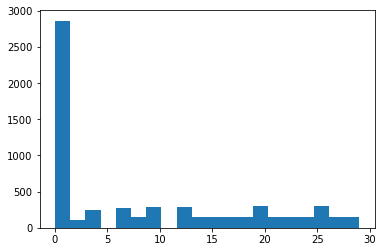

In [4]:
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# # results[(results.network_name == "wiki") & (results.threshold == 2)].groupby('budget_total').max()
results['gamma'] = results['total_mcich'] / results['total_degree']
high_vals = results[results.gamma > 1]
plt.hist(high_vals['budget_total'], bins=20)

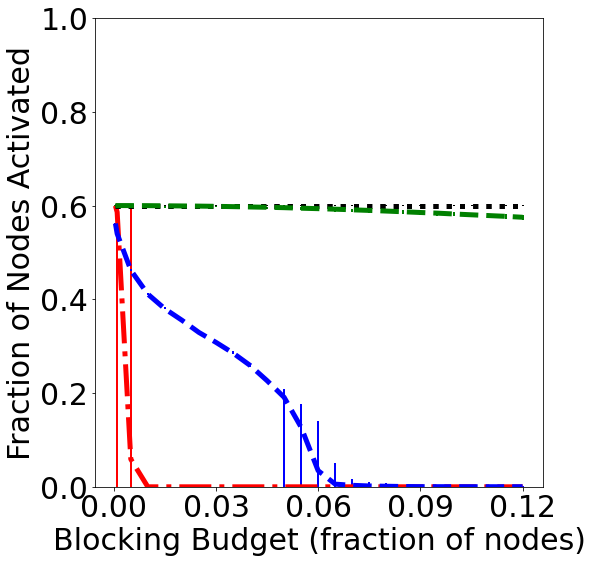

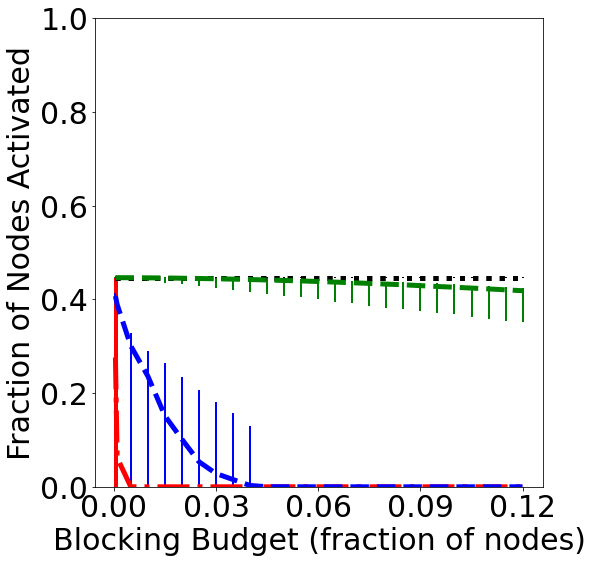

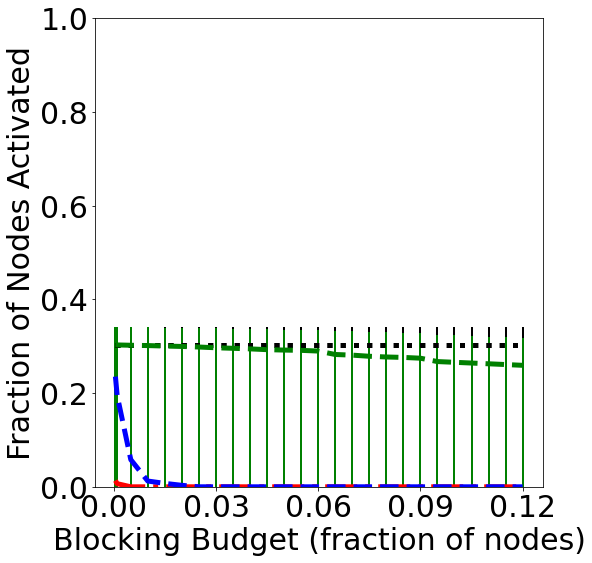

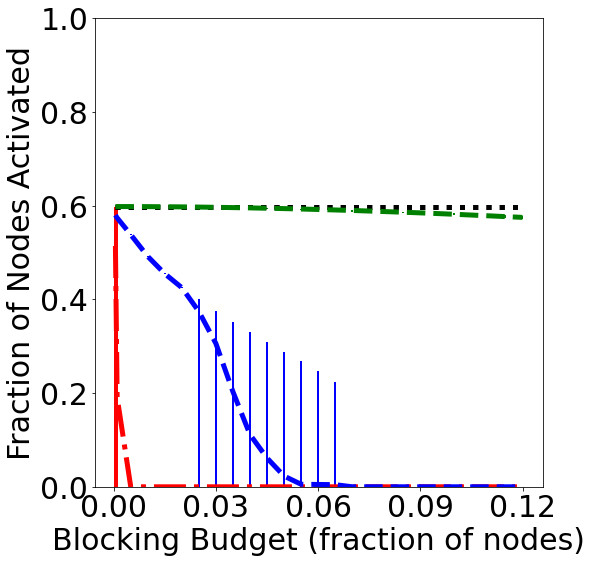

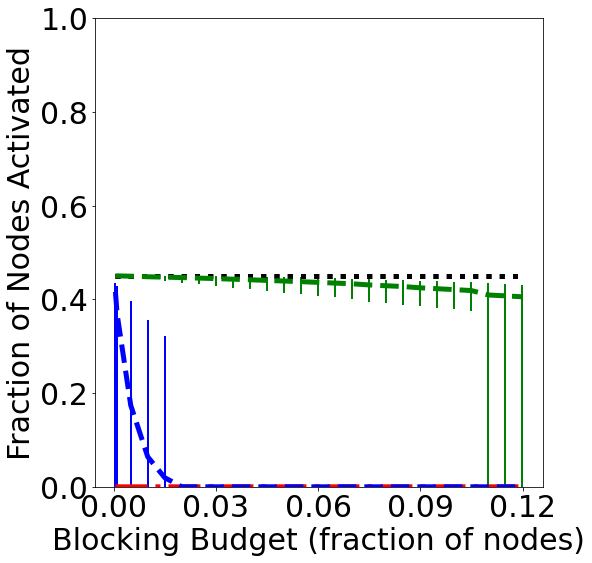

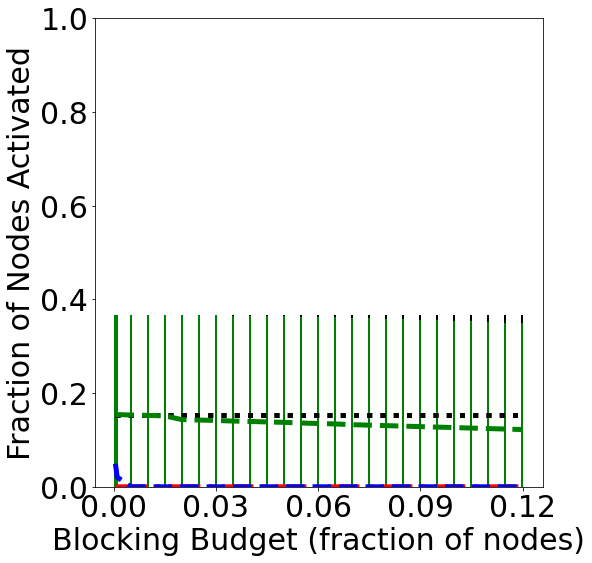

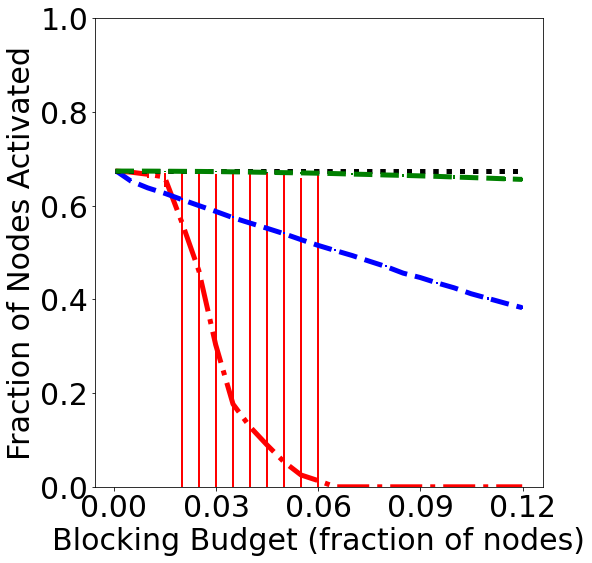

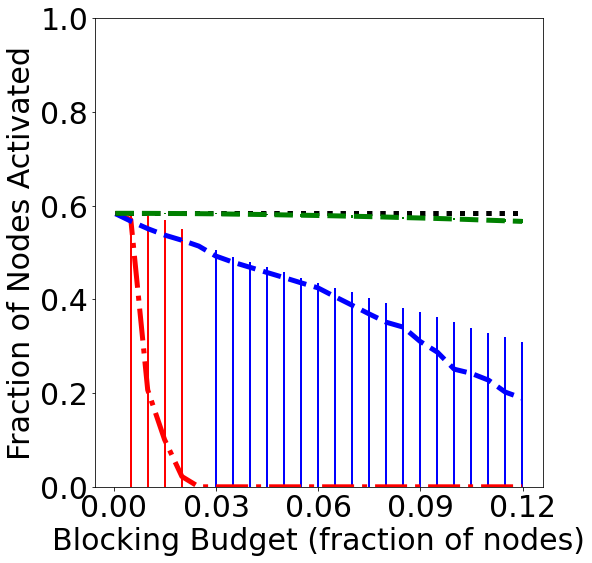

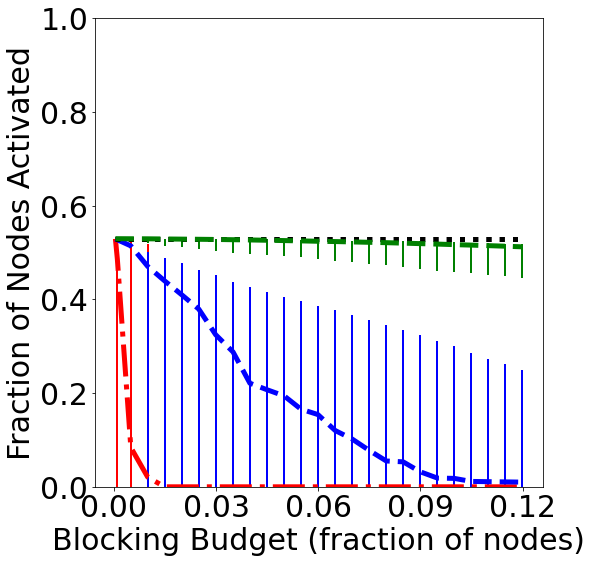

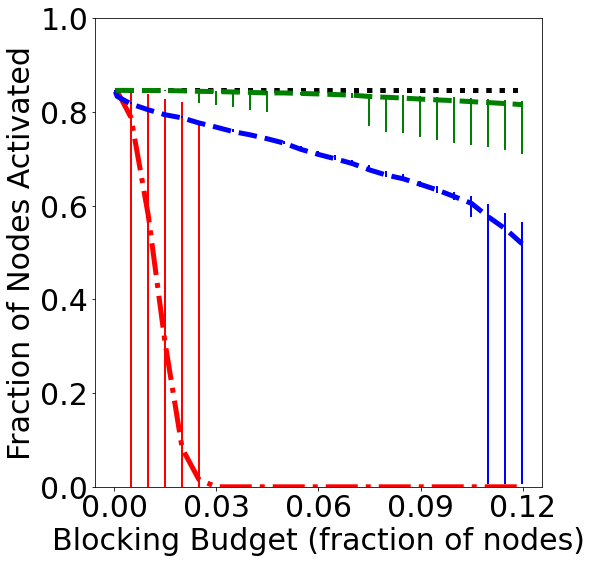

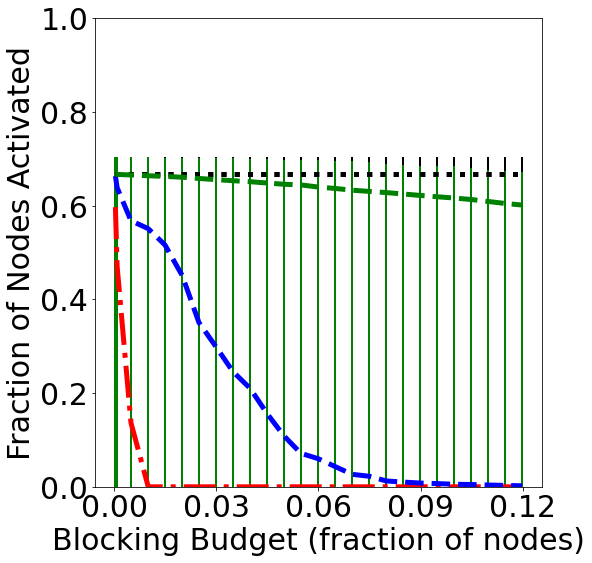

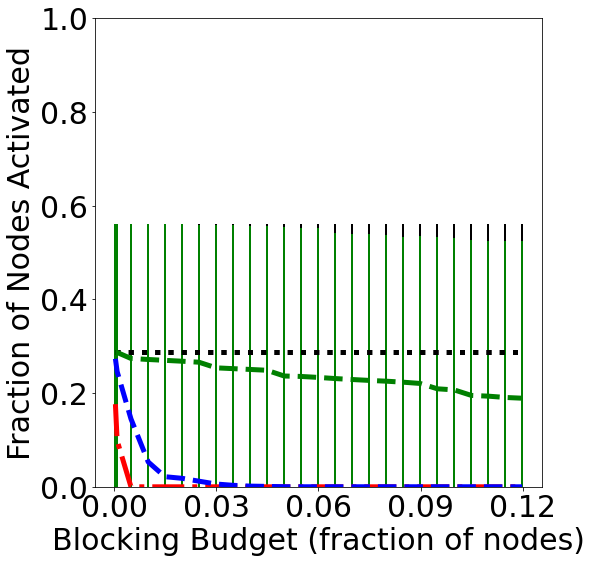

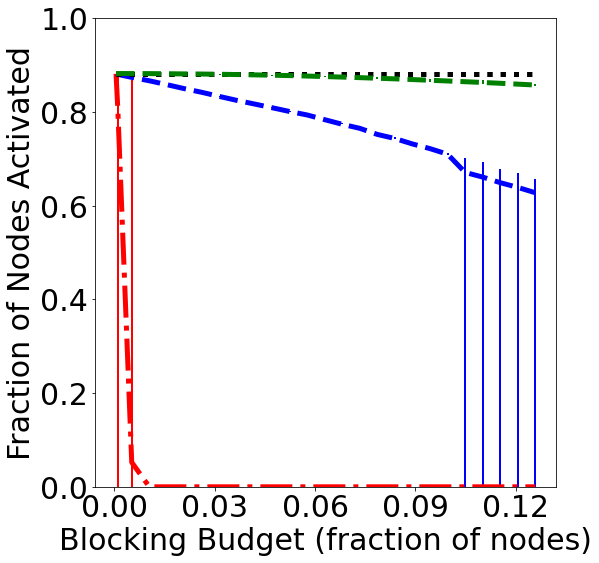

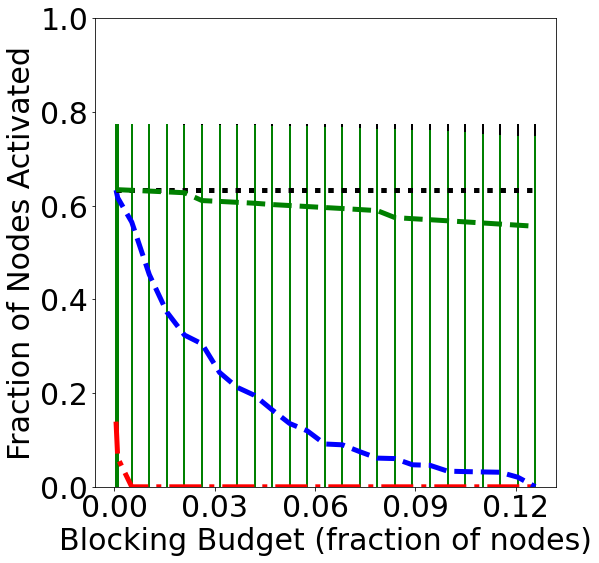

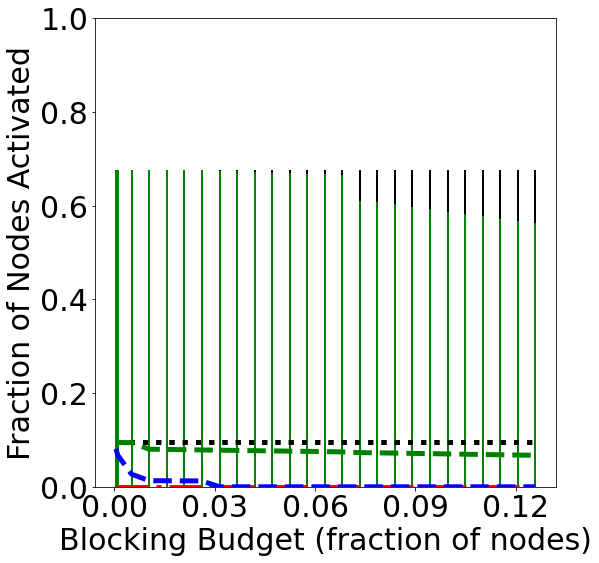

In [46]:


names = ['enron.giant.clean.uel', 'slashdot0811', 'wiki', 'fb-pages-politician', 'astroph']
thres = [2, 3, 4]

font = {'family' : 'normal',
        'size'   : 30}
fontP = FontProperties(size=16)
plt.rc('font', **font)

for name in names:
    net_results = results[results.network_name == name]
#        threshold = threshold[threshold.seed_size == 10]
    for i in range(len(thres)):
        threshold = net_results[net_results.threshold == thres[i]]
        split = threshold.groupby(['budget_total']).mean()
        max_spread = threshold.groupby(['budget_total']).max()
        min_spread = threshold.groupby(['budget_total']).min()
        std = threshold.groupby(['budget_total']).std()
        fig, ax = plt.subplots(figsize=(8, 8))
        budgets = threshold['budget_total'].unique().tolist()
        total_cbh = split['total_mcich'].tolist()
        total_degree = split['total_degree'].tolist()
        total_no_block = split['total_no_block'].tolist()
        total_random = split['total_random'].tolist()
        
        mcich_bounds = [np.abs(min_spread['total_mcich'].to_numpy() - total_cbh), max_spread['total_mcich'].to_numpy() - total_cbh]
        degree_bounds = [np.abs(min_spread['total_degree'].to_numpy() - total_degree), max_spread['total_degree'].to_numpy() - total_degree]
        random_bounds = [np.abs(min_spread['total_random'].to_numpy() - total_random), max_spread['total_random'].to_numpy() - total_random]
        no_block_bounds = [np.abs(min_spread['total_no_block'].to_numpy() - total_no_block), max_spread['total_no_block'].to_numpy() - total_no_block]
        
        ax.errorbar(x=budgets, y=total_cbh, yerr=mcich_bounds, fmt='r-.', linewidth=5, elinewidth=2)
        ax.errorbar(budgets, total_degree, yerr=degree_bounds, fmt='b--', linewidth=5, elinewidth=2)
        ax.errorbar(x=budgets, y=total_no_block, yerr=no_block_bounds, fmt='k:', linewidth=5, elinewidth=2)
        no_block, = ax.plot(budgets, total_no_block, 'k:', linewidth=5)
        ax.errorbar(budgets, total_random, yerr=random_bounds, fmt='g--', linewidth=5, elinewidth=2)     
        ax.set_xticks(np.arange(0, .13, .03))
        ax.set_yticks(np.arange(0, 1.1, .2))
        fig.tight_layout(pad=1)
#         fig.legend([cbh, degree, no_block, random], ['MCICH', "High Degree", "No Blocking", "Random"], bbox_to_anchor=(1.05, 1),   borderaxespad= 1, loc='center right', prop=fontP)
#         ax.set_title(name + " Fraction Infected", pad=2)
#         if name == 'fb-pages-politician':
#             ax.set_title("fb-poli Fraction Infected", pad=2)
        ax.set_xlabel("Blocking Budget (fraction of nodes)")
        ax.set_ylabel("Fraction of Nodes Activated")
        plt.ylim(0)
#         ax.yaxis.set_ticks_position("right")
#         ax.yaxis.set_label_position("right")
#         plt.savefig("plots/50_rep_centola/" + name + "_thres_" + str(thres[i]) + ".pdf", bbox_inches="tight")

In [20]:
saved_per_blocking = (results['total_no_block'] - results['total_mcich']) / results['budget_total']
saved_per_blocking
np.mean(saved_per_blocking)

26.229221058347772

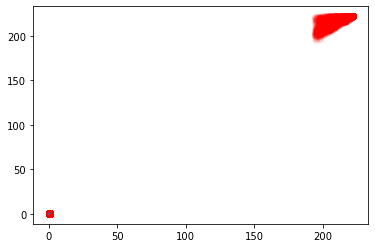

In [9]:
fig,ax = plt.subplots()
ax.scatter(results['total_degree'], results['total_mcich'], c='r', alpha=.05)
ax.plot(np.linspace(0, 1), np.linspace(0, 1))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


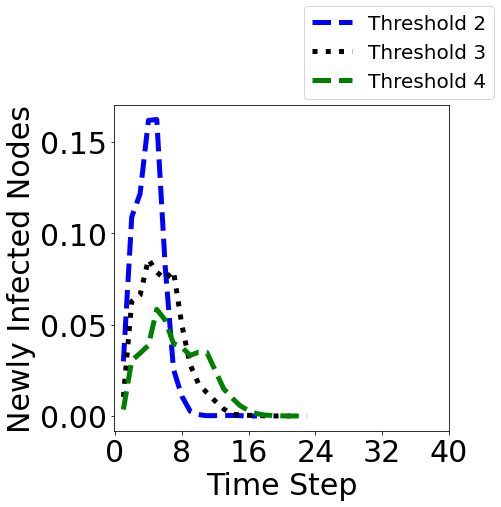

In [8]:
fig, ax = plt.subplots(figsize=(6, 6))
method_name = epi_info['blocking'].unique()
fontP = FontProperties(size=20)
plots = []
symbols = ['r-.', 'b--', 'k:', 'g--']
method = "no_block"
for threshold in [2,3,4]:
#     method = method_name[i]
    sub_epi = epi_info[(epi_info.blocking == method) & (epi_info.threshold == threshold)]
    avg = sub_epi[['time', 'newly_infected']].groupby('time').mean()['newly_infected']
    avg /= 7066
    times = sub_epi['time'].unique()
    cumsum = avg.cumsum()
    missing_time = np.setdiff1d(epi_info.time.unique(),times)
    saturation_point = cumsum.max()
    saturation = pd.Series([saturation_point for time in missing_time])
    filled_in_times = np.append(times, missing_time)
    cumsum = pd.concat([cumsum, saturation])
    plot, = ax.plot(times, avg, symbols[threshold - 1], linewidth=5)
    plots.append(plot)
ax.set_xticks(np.arange(0, epi_info.time.max()+ 1, 8))
# ax.set_yticks(np.arange(0, avg.max()+ 1, avg.max() // 5))
ax.set_xlabel('Time Step')
ax.set_ylabel("Newly Infected Nodes")
# ax.set_title("Epidemic Curves")
fig.legend(plots, ['Threshold ' + str(i) for i in [2,3,4]], bbox_to_anchor=(1.05, 1),   borderaxespad= 1, loc='center right', prop=fontP)
plt.savefig("plots/epi_curve_no_block.pdf", bbox_inches="tight")

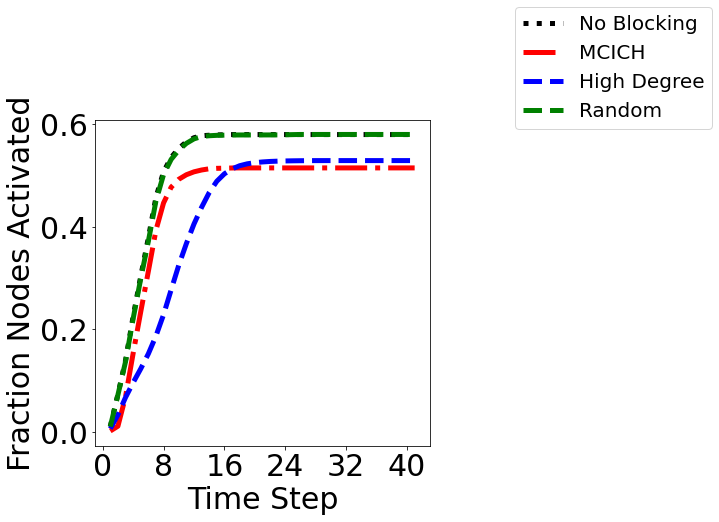

In [10]:
fig2, ax2 = plt.subplots(figsize=(6, 6))
# method_name = epi_info['blocking'].unique()
plots = []
plots2 = []
symbols = ['k:', 'r-.','b--',  'g--']
labels = [ "No Blocking", 'MCICH', "High Degree", "Random"]
method_name = ['no_block', 'mcich', 'degree', 'random']
for i in range(len(method_name)):
    method = method_name[i]
    sub_epi = epi_info[(epi_info.blocking == method) & (epi_info.threshold == 3)]
    avg = sub_epi[['time', 'newly_infected']].groupby('time').mean()['newly_infected']
    avg /= 7066
    times = sub_epi['time'].unique()
    cumsum = avg.cumsum()
    missing_time = np.setdiff1d(epi_info.time.unique(),times)
    saturation_point = cumsum.max()
    saturation = pd.Series([saturation_point for time in missing_time])
    filled_in_times = np.append(times, missing_time)
    cumsum = pd.concat([cumsum, saturation])
    plot2, = ax2.plot(filled_in_times, cumsum, symbols[i], linewidth=5)
    plots2.append(plot2)
ax2.set_xticks(np.arange(0, epi_info.time.max()+ 1, 8))
# ax.set_yticks(np.arange(0, avg.max()+ 1, avg.max() // 5))
ax2.set_xlabel("Time Step")
ax2.set_ylabel("Fraction Nodes Activated")
# ax2.set_title("Cumulative Infected")
fig2.legend(plots2, labels, bbox_to_anchor=(1.05, 1),   borderaxespad= 1, loc='center left', prop=fontP)
plt.savefig("plots/cum_curve_blocking.pdf", bbox_inches="tight")

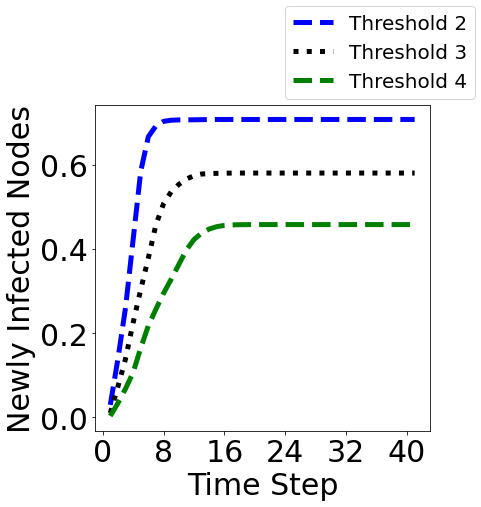

In [76]:
fig, ax = plt.subplots(figsize=(6, 6))
method_name = epi_info['blocking'].unique()
fontP = FontProperties(size=20)
plots = []
symbols = ['r-.', 'b--', 'k:', 'g--']
method = "no_block"
for threshold in [2,3,4]:
#     method = method_name[i]
    sub_epi = epi_info[(epi_info.blocking == method) & (epi_info.threshold == threshold)]
    avg = sub_epi[['time', 'newly_infected']].groupby('time').mean()['newly_infected']
    avg /= 7066
    times = sub_epi['time'].unique()
    cumsum = avg.cumsum()
    missing_time = np.setdiff1d(epi_info.time.unique(),times)
    saturation_point = cumsum.max()
    saturation = pd.Series([saturation_point for time in missing_time])
    filled_in_times = np.append(times, missing_time)
    cumsum = pd.concat([cumsum, saturation])
    plot, = ax.plot(filled_in_times, cumsum, symbols[threshold - 1], linewidth=5)
    plots.append(plot)
ax.set_xticks(np.arange(0, epi_info.time.max()+ 1, 8))
# ax.set_yticks(np.arange(0, avg.max()+ 1, avg.max() // 5))
ax.set_xlabel('Time Step')
ax.set_ylabel("Newly Infected Nodes")
# ax.set_title("Epidemic Curves")
fig.legend(plots, ['Threshold ' + str(i) for i in [2,3,4]], bbox_to_anchor=(1.05, 1),   borderaxespad= 1, loc='center right', prop=fontP)
plt.savefig("plots/cum_curve_no_block.pdf", bbox_inches="tight")

In [15]:
results[(results.network_name == 'astroph') & (results.threshold == 4)][['total_no_block']]

,total_no_block
143,0.064552
144,0.064552
145,0.064552
146,0.064552
147,0.064552
148,0.064552
149,0.064552
150,0.064552
151,0.064552
152,0.064552


In [44]:
maxes = results.groupby(["threshold", "budget_total", "network_name"]).max()
sanity_check = maxes['total_random'] <= maxes['total_no_block']
sanity_check.all()
print(results[results.network_name == "astroph"])

     network_name    seed_method  threshold  seed_size  budget_total  \
0         astroph  random_k_core          2   0.001117      0.000503   
1         astroph  random_k_core          2   0.001117      0.001005   
2         astroph  random_k_core          2   0.001117      0.005195   
3         astroph  random_k_core          2   0.001117      0.010445   
4         astroph  random_k_core          2   0.001117      0.015696   
...           ...            ...        ...        ...           ...   
3895      astroph  random_k_core          4   0.001117      0.104843   
3896      astroph  random_k_core          4   0.001117      0.110037   
3897      astroph  random_k_core          4   0.001117      0.115288   
3898      astroph  random_k_core          4   0.001117      0.120538   
3899      astroph  random_k_core          4   0.001117      0.125789   

      no_block_0  no_block_1  no_block_2  no_block_3  mcich_0  ...  random_2  \
0           2959           0           0       15812   